<a href="https://colab.research.google.com/github/nagi1995/buildwithai-hackathon/blob/main/buildwithai-eda-modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [247]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [248]:
df = pd.read_csv("COVID-19 Survey Student Responses.csv")
df.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

In [250]:
# Reference: https://www.kaggle.com/ayushggarg/impact-of-covid-19-on-students-eda/notebook?scriptVersionId=49235855&cellId=6

df["Time spent on TV"].replace("No tv", 0, inplace=True)
df["Time spent on TV"].replace("n", 0, inplace=True)
df["Time spent on TV"].replace("N", 0, inplace=True)
df["Time spent on TV"].replace(" ", 0, inplace=True)
df["Time spent on TV"] = df["Time spent on TV"].astype("float")

df["Prefered social media platform"] = df["Prefered social media platform"].replace("None ", "None")
df["Prefered social media platform"] = df["Prefered social media platform"].replace("Whatsapp", "WhatsApp")

df["Rating of Online Class experience"] = df["Rating of Online Class experience"].replace(np.nan, "Not Rated")
df["Medium for online class"] = df["Medium for online class"].replace(np.nan, "Any Gadget")

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1182 non-null   object 
 5   Medium for online class                                                             1182 non-null

In [252]:
df["Region of residence"].value_counts()

Delhi-NCR            721
Outside Delhi-NCR    461
Name: Region of residence, dtype: int64

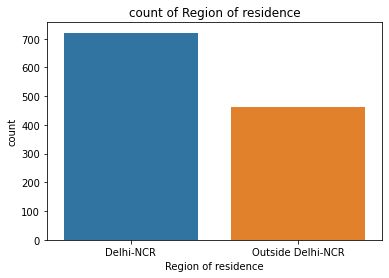

In [253]:
plt.figure()
sns.countplot(data = df, x = df["Region of residence"])
plt.title("count of Region of residence")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


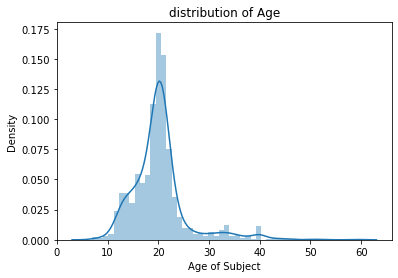

In [254]:
plt.figure()
sns.distplot(df["Age of Subject"], kde = True)
plt.title("distribution of Age")
plt.show()

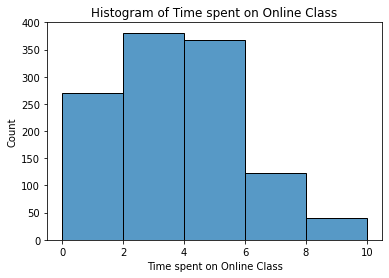

In [256]:
plt.figure()
sns.histplot(data = df, x = df["Time spent on Online Class"], bins = 5)
plt.title("Histogram of Time spent on Online Class")
plt.show()

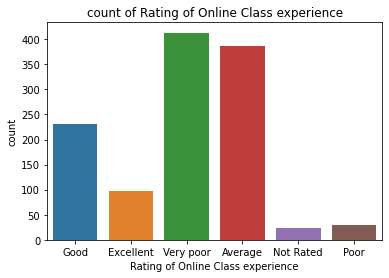

In [257]:
plt.figure()
sns.countplot(data = df, x = df["Rating of Online Class experience"])
plt.title("count of Rating of Online Class experience")
plt.show()

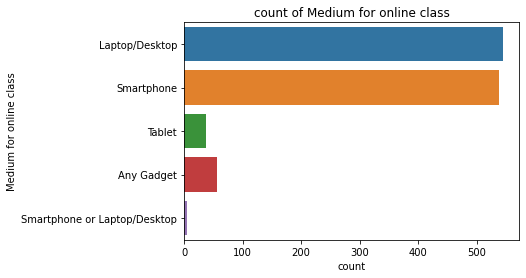

In [258]:
plt.figure()
sns.countplot(data = df, y = df["Medium for online class"])
plt.title("count of Medium for online class")
plt.show()

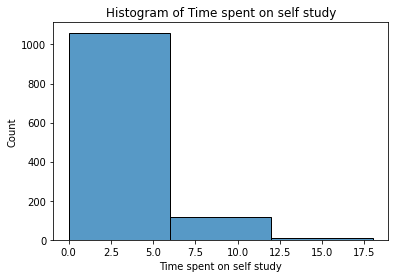

In [259]:
plt.figure()
sns.histplot(data = df, x = df["Time spent on self study"], bins = 3)
plt.title("Histogram of Time spent on self study")
plt.show()

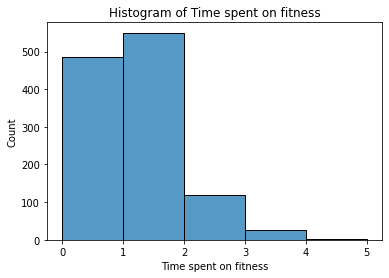

In [260]:
plt.figure()
sns.histplot(data = df, x = df["Time spent on fitness"], bins = 5)
plt.title("Histogram of Time spent on fitness")
plt.show()

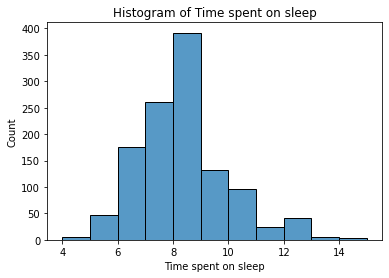

In [261]:
plt.figure()
sns.histplot(data = df, x = df["Time spent on sleep"], bins = 11)
plt.title("Histogram of Time spent on sleep")
plt.show()

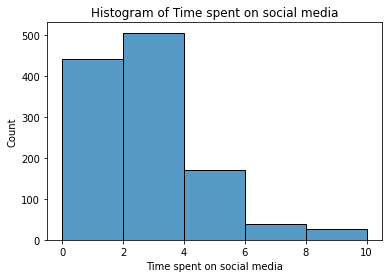

In [262]:
plt.figure()
sns.histplot(data = df, x = df["Time spent on social media"], bins = 5)
plt.title("Histogram of Time spent on social media")
plt.show()

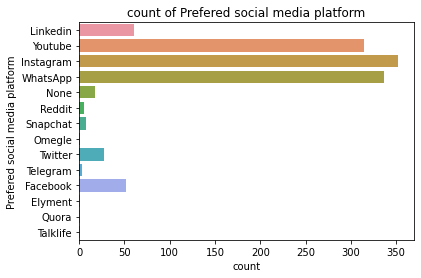

In [263]:
plt.figure()
sns.countplot(data = df, y = df["Prefered social media platform"])
plt.title("count of Prefered social media platform")
plt.show()

In [264]:
df["Prefered social media platform"].value_counts()

Instagram    352
WhatsApp     337
Youtube      314
Linkedin      61
Facebook      52
Twitter       28
None          18
Snapchat       8
Reddit         5
Telegram       3
Quora          1
Talklife       1
Omegle         1
Elyment        1
Name: Prefered social media platform, dtype: int64

In [265]:
df["Prefered social media platform"] = df["Prefered social media platform"].replace("Snapchat", "other")
df["Prefered social media platform"] = df["Prefered social media platform"].replace("Reddit", "other")
df["Prefered social media platform"] = df["Prefered social media platform"].replace("Telegram", "other")
df["Prefered social media platform"] = df["Prefered social media platform"].replace("Omegle", "other")
df["Prefered social media platform"] = df["Prefered social media platform"].replace("Elyment", "other")
df["Prefered social media platform"] = df["Prefered social media platform"].replace("Quora", "other")
df["Prefered social media platform"] = df["Prefered social media platform"].replace("Talklife", "other")

In [266]:
df["Prefered social media platform"].value_counts()

Instagram    352
WhatsApp     337
Youtube      314
Linkedin      61
Facebook      52
Twitter       28
other         20
None          18
Name: Prefered social media platform, dtype: int64

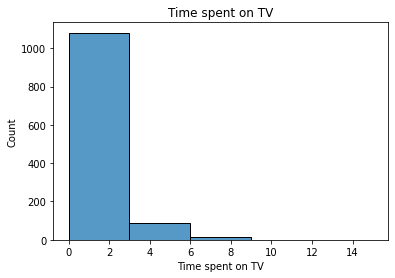

In [267]:
plt.figure()
sns.histplot(data = df, x = df["Time spent on TV"], bins = 5)
plt.title("Time spent on TV")
plt.show()

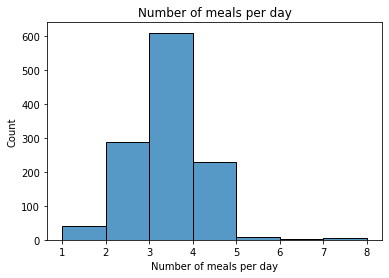

In [268]:
plt.figure()
sns.histplot(data = df, x = df["Number of meals per day"], bins = 7)
plt.title("Number of meals per day")
plt.show()

In [269]:
df["Number of meals per day"].value_counts()

3    610
2    287
4    229
1     41
5      8
7      4
6      2
8      1
Name: Number of meals per day, dtype: int64

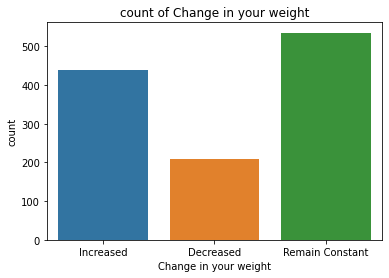

In [270]:
plt.figure()
sns.countplot(data = df, x = df["Change in your weight"])
plt.title("count of Change in your weight")
plt.show()

In [271]:
df["Change in your weight"].value_counts()

Remain Constant    535
Increased          438
Decreased          209
Name: Change in your weight, dtype: int64

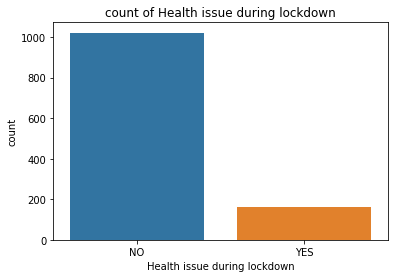

In [272]:
plt.figure()
sns.countplot(data = df, x = df["Health issue during lockdown"])
plt.title("count of Health issue during lockdown")
plt.show()

In [273]:
df["Health issue during lockdown"].value_counts()

NO     1021
YES     161
Name: Health issue during lockdown, dtype: int64

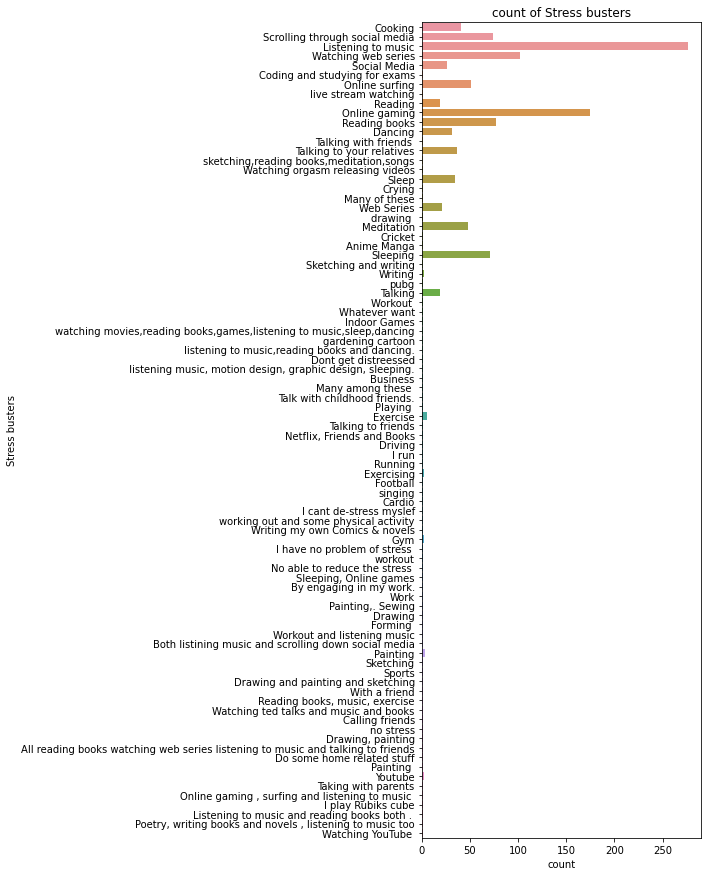

In [274]:
plt.figure(figsize = (5, 15))
sns.countplot(data = df, y = df["Stress busters"])
plt.title("count of Stress busters")
plt.show()

In [275]:
df["Stress busters"].value_counts()

Listening to music                        276
Online gaming                             175
Watching web series                       102
Reading books                              77
Scrolling through social media             74
                                         ... 
Drawing                                     1
Football                                    1
working out and some physical activity      1
Cardio                                      1
Watching orgasm releasing videos            1
Name: Stress busters, Length: 86, dtype: int64

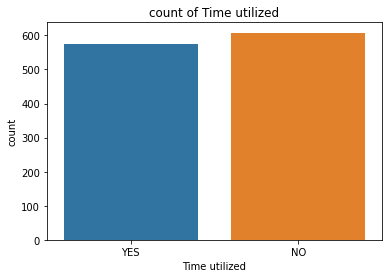

In [276]:
plt.figure()
sns.countplot(data = df, x = df["Time utilized"])
plt.title("count of Time utilized")
plt.show()

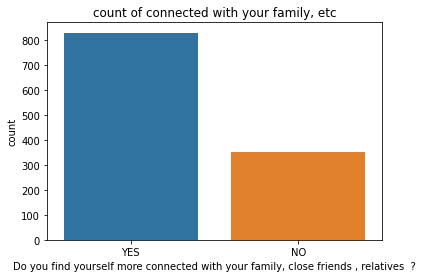

In [277]:
plt.figure()
sns.countplot(data = df, x = df["Do you find yourself more connected with your family, close friends , relatives  ?"])
plt.title("count of connected with your family, etc")
plt.show()

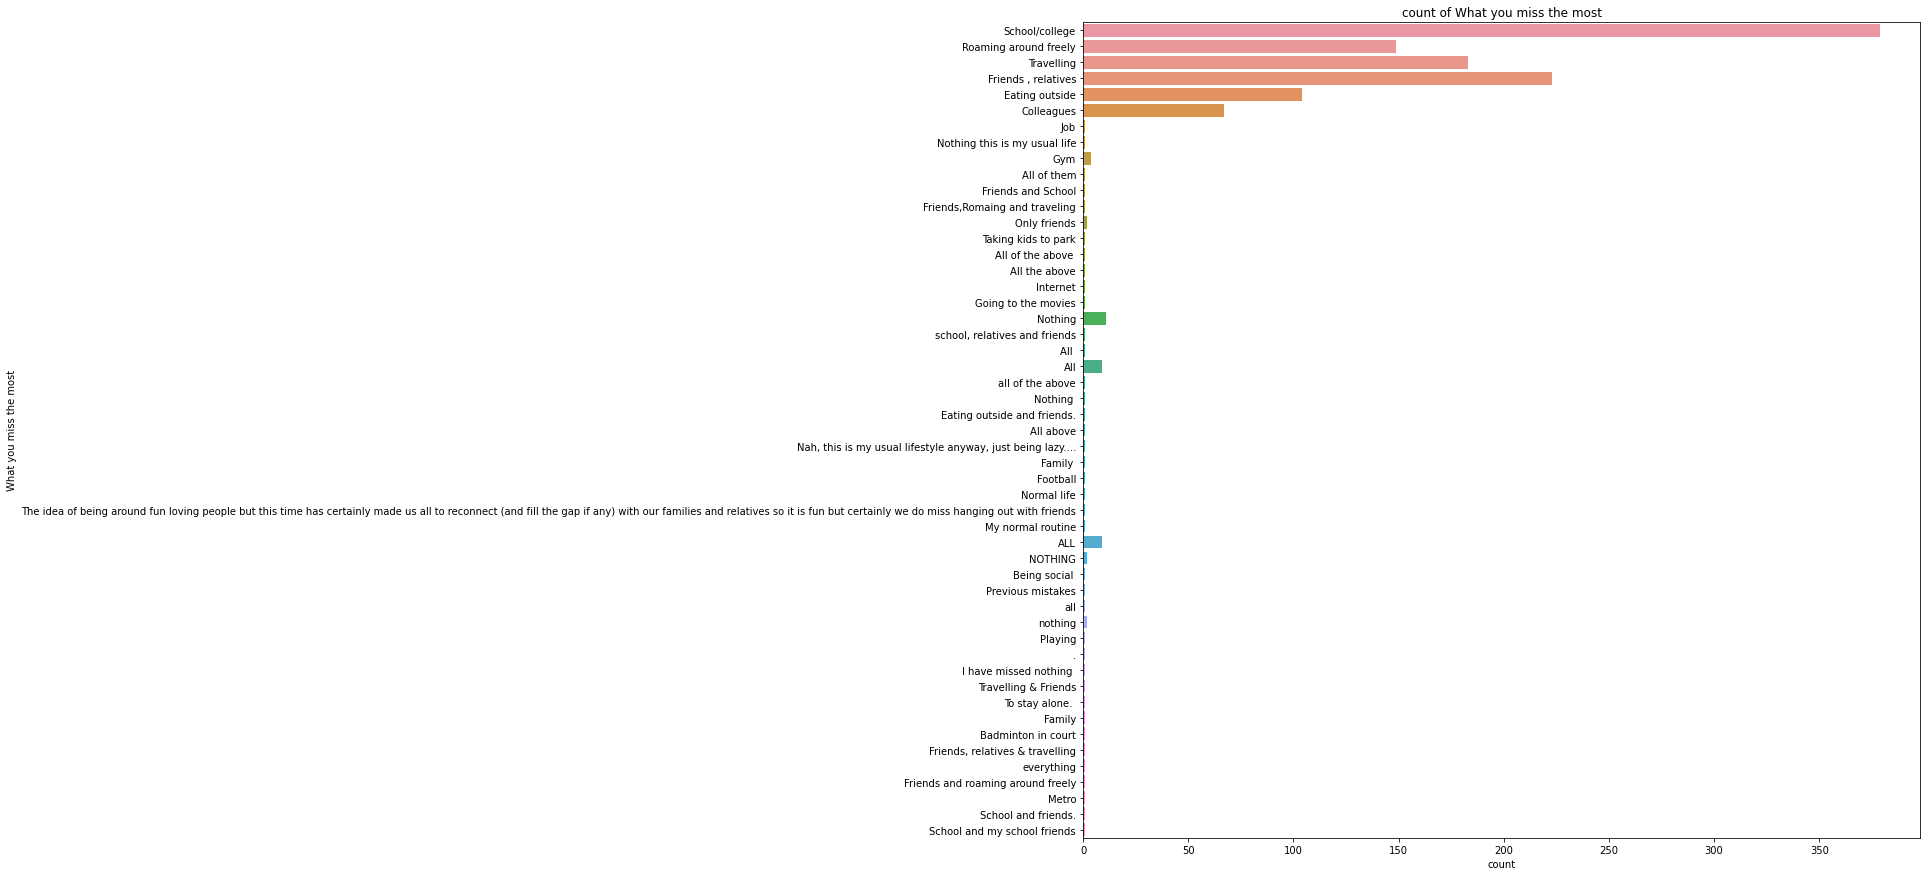

In [278]:
plt.figure(figsize = (15, 15))
sns.countplot(data = df, y = df["What you miss the most"])
plt.title("count of What you miss the most")
plt.show()

In [279]:
df["What you miss the most"].value_counts()

School/college                                                                                                                                                                                                              379
Friends , relatives                                                                                                                                                                                                         223
Travelling                                                                                                                                                                                                                  183
Roaming around freely                                                                                                                                                                                                       149
Eating outside                                                                                          

In [280]:
np.unique(df["What you miss the most"])

array(['.', 'ALL', 'All', 'All ', 'All above', 'All of the above ',
       'All of them', 'All the above', 'Badminton in court',
       'Being social ', 'Colleagues', 'Eating outside',
       'Eating outside and friends.', 'Family', 'Family ', 'Football',
       'Friends , relatives', 'Friends and School',
       'Friends and roaming around freely',
       'Friends, relatives & travelling', 'Friends,Romaing and traveling',
       'Going to the movies', 'Gym', 'I have missed nothing ', 'Internet',
       'Job', 'Metro', 'My normal routine', 'NOTHING',
       'Nah, this is my usual lifestyle anyway, just being lazy....',
       'Normal life', 'Nothing', 'Nothing ',
       'Nothing this is my usual life', 'Only friends', 'Playing',
       'Previous mistakes', 'Roaming around freely',
       'School and friends.', 'School and my school friends',
       'School/college', 'Taking kids to park',
       'The idea of being around fun loving people but this time has certainly made us all to reco

# Modelling

In [295]:
df.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1.0,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0.0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0.0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0.0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1.0,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [296]:
data = df.drop(columns = ["ID", "Stress busters", "What you miss the most"])
df_encoded = pd.get_dummies(data = data)
df_encoded.drop(columns = ["Health issue during lockdown_NO"], inplace = True)
df_encoded.head()

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Time spent on TV,Number of meals per day,Region of residence_Delhi-NCR,Region of residence_Outside Delhi-NCR,Rating of Online Class experience_Average,Rating of Online Class experience_Excellent,Rating of Online Class experience_Good,Rating of Online Class experience_Not Rated,Rating of Online Class experience_Poor,Rating of Online Class experience_Very poor,Medium for online class_Any Gadget,Medium for online class_Laptop/Desktop,Medium for online class_Smartphone,Medium for online class_Smartphone or Laptop/Desktop,Medium for online class_Tablet,Prefered social media platform_Facebook,Prefered social media platform_Instagram,Prefered social media platform_Linkedin,Prefered social media platform_None,Prefered social media platform_Twitter,Prefered social media platform_WhatsApp,Prefered social media platform_Youtube,Prefered social media platform_other,Change in your weight_Decreased,Change in your weight_Increased,Change in your weight_Remain Constant,Health issue during lockdown_YES,Time utilized_NO,Time utilized_YES,"Do you find yourself more connected with your family, close friends , relatives ?_NO","Do you find yourself more connected with your family, close friends , relatives ?_YES"
0,21,2.0,4.0,0.0,7.0,3.0,1.0,4,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
1,21,0.0,0.0,2.0,10.0,3.0,0.0,3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0
2,20,7.0,3.0,0.0,6.0,2.0,0.0,3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
3,20,3.0,2.0,1.0,6.0,5.0,0.0,3,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,21,3.0,3.0,1.0,8.0,3.0,1.0,4,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0


In [297]:
train, test = train_test_split(df_encoded, stratify = df_encoded["Health issue during lockdown_YES"], test_size = .25, random_state = 42)

train.shape, test.shape

((886, 37), (296, 37))

In [298]:
scaler = StandardScaler()

scaler.fit(train.values[:, :8])

x_numerical_train = scaler.transform(train.values[:, :8])
x_categorical_train = train.drop(columns = ["Health issue during lockdown_YES"]).values[:, 8:]

x_numerical_test = scaler.transform(test.values[:, :8])
x_categorical_test = test.drop(columns = ["Health issue during lockdown_YES"]).values[:, 8:]



x_train = np.hstack((x_numerical_train, x_categorical_train))
x_test = np.hstack((x_numerical_test, x_categorical_test))


y_train = train["Health issue during lockdown_YES"]
y_test = test["Health issue during lockdown_YES"]



x_train.shape, x_test.shape, y_train.shape, y_test.shape

((886, 36), (296, 36), (886,), (296,))

# Logistic Regression

In [299]:
model = LogisticRegression(max_iter = 500)

params = {"C" : [0.0001, .00033, .001, .0033, .01, .033, .1, .33, 1, 3.3, 10, 33, 100]}

gridsearch = GridSearchCV(model, param_grid = params, cv = 5, scoring = "f1", return_train_score = True)
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.00033, 0.001, 0.0033, 0.01, 0.033, 0.1,
                               0.33, 1, 3.3, 10, 33, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

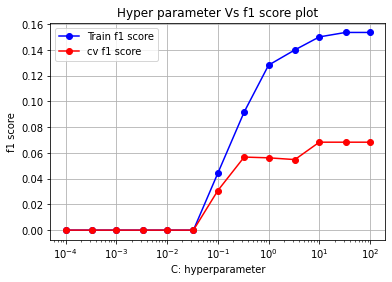

In [300]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)
results = results.sort_values(['param_C'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score']
K = results['param_C']

plt.figure()
plt.plot(K, train_score, "bo-", label = "Train f1 score")
plt.plot(K, cv_score, "ro-", label = "cv f1 score")
plt.legend()
plt.xscale("log")
plt.xlabel("C: hyperparameter")
plt.ylabel("f1 score")
plt.title("Hyper parameter Vs f1 score plot")
plt.grid()
plt.show()

In [301]:
C = 3.3

0.18181818181818182


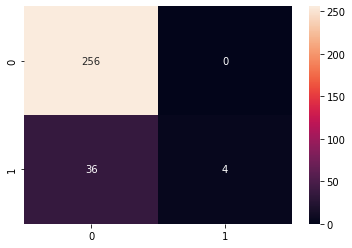

In [302]:
model = LogisticRegression(C = C, max_iter = 500)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")

In [303]:
sm = SMOTE(random_state = 10)

x_train_smote, y_train_smote = sm.fit_sample(x_train, y_train)
x_train_smote.shape, y_train_smote.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((1530, 36), (1530,))

In [305]:
rus = RandomUnderSampler(random_state = 42)

x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)
x_train_rus.shape, y_train_rus.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((242, 36), (242,))

In [306]:
model = LogisticRegression(max_iter = 500)

params = {"C" : [0.0001, .00033, .001, .0033, .01, .033, .1, .33, 1, 3.3, 10, 33, 100]}

gridsearch = GridSearchCV(model, param_grid = params, cv = 5, scoring = "f1", return_train_score = True)
gridsearch.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.00033, 0.001, 0.0033, 0.01, 0.033, 0.1,
                               0.33, 1, 3.3, 10, 33, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

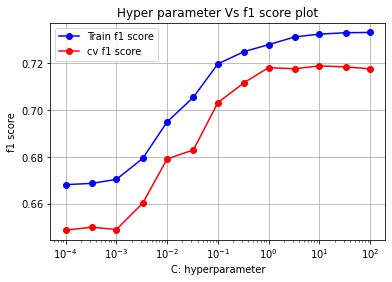

In [307]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)
results = results.sort_values(['param_C'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score']
K = results['param_C']

plt.figure()
plt.plot(K, train_score, "bo-", label = "Train f1 score")
plt.plot(K, cv_score, "ro-", label = "cv f1 score")
plt.legend()
plt.xscale("log")
plt.xlabel("C: hyperparameter")
plt.ylabel("f1 score")
plt.title("Hyper parameter Vs f1 score plot")
plt.grid()
plt.show()

In [308]:
C = 3.3

0.27586206896551724


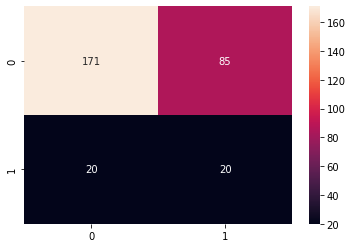

In [310]:
model = LogisticRegression(C = C, max_iter = 500)
model.fit(x_train_smote, y_train_smote)

y_pred = model.predict(x_test)
print(f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")

In [311]:
model = LogisticRegression(max_iter = 500)

params = {"C" : [0.0001, .00033, .001, .0033, .01, .033, .1, .33, 1, 3.3, 10, 33, 100]}

gridsearch = GridSearchCV(model, param_grid = params, cv = 5, scoring = "f1", return_train_score = True)
gridsearch.fit(x_train_rus, y_train_rus)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.00033, 0.001, 0.0033, 0.01, 0.033, 0.1,
                               0.33, 1, 3.3, 10, 33, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

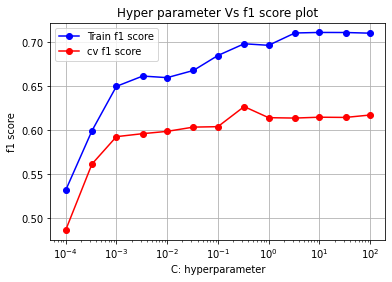

In [312]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)
results = results.sort_values(['param_C'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score']
K = results['param_C']

plt.figure()
plt.plot(K, train_score, "bo-", label = "Train f1 score")
plt.plot(K, cv_score, "ro-", label = "cv f1 score")
plt.legend()
plt.xscale("log")
plt.xlabel("C: hyperparameter")
plt.ylabel("f1 score")
plt.title("Hyper parameter Vs f1 score plot")
plt.grid()
plt.show()

0.3026315789473684


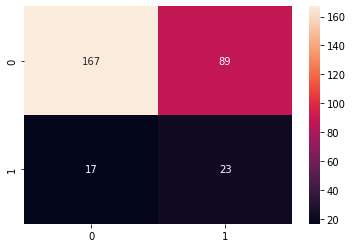

In [326]:
C = 1

model = LogisticRegression(C = C, max_iter = 500)
model.fit(x_train_rus, y_train_rus)

y_pred = model.predict(x_test)
print(f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")

# SVC

In [108]:
model = SVC()
params = {"kernel" : ["linear", "poly", "rbf", "sigmoid"], 
          "C" : [0.0001, .00033, .001, .0033, .01, .033, .1, .33, 1, 3.3, 10, 33, 100]}


gridsearch = GridSearchCV(model, param_grid = params, cv = 5, scoring = "f1", return_train_score = True)
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.00033, 0.001, 0.0033, 0.01, 0.033, 0.1,
                               0.33, 1, 3.3, 10, 33, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

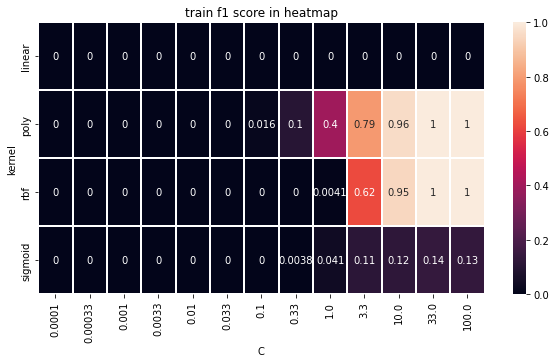

In [79]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)

plt.figure(figsize = (10, 5))
hmap = results.pivot("param_kernel", "param_C", "mean_train_score")
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.ylabel("kernel")
plt.xlabel("C")
plt.title("train f1 score in heatmap")
plt.show()

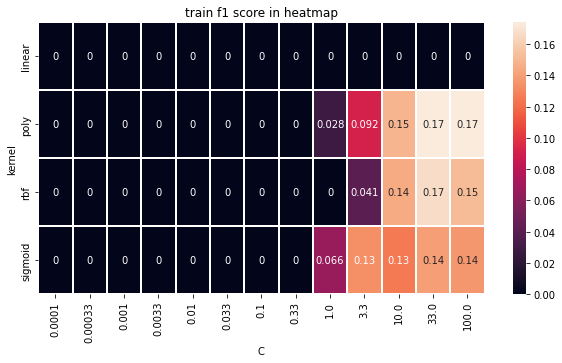

In [78]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)

plt.figure(figsize = (10, 5))
hmap = results.pivot("param_kernel", "param_C", "mean_test_score")
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.ylabel("kernel")
plt.xlabel("C")
plt.title("train f1 score in heatmap")
plt.show()

0.2368421052631579


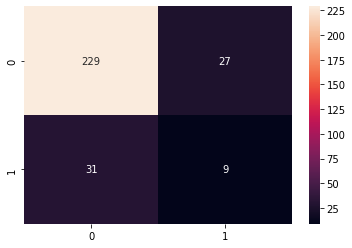

In [109]:
C = 33
kernel = "rbf"

model = SVC(C = C, kernel = kernel)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")

In [110]:
model = SVC()
params = {"kernel" : ["linear", "poly", "rbf", "sigmoid"], 
          "C" : [0.0001, .00033, .001, .0033, .01, .033, .1, .33, 1, 3.3, 10, 33, 100]}


gridsearch = GridSearchCV(model, param_grid = params, cv = 5, scoring = "f1", return_train_score = True)
gridsearch.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.00033, 0.001, 0.0033, 0.01, 0.033, 0.1,
                               0.33, 1, 3.3, 10, 33, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

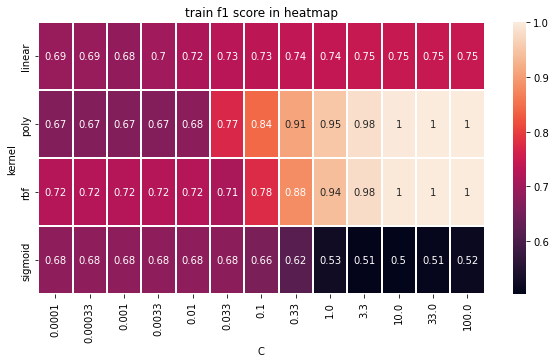

In [85]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)

plt.figure(figsize = (10, 5))
hmap = results.pivot("param_kernel", "param_C", "mean_train_score")
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.ylabel("kernel")
plt.xlabel("C")
plt.title("train f1 score in heatmap")
plt.show()

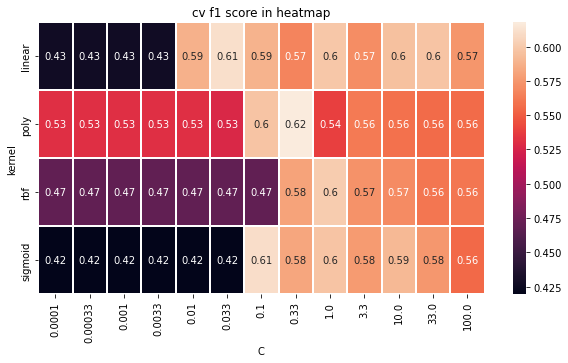

In [330]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)

plt.figure(figsize = (10, 5))
hmap = results.pivot("param_kernel", "param_C", "mean_test_score")
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.ylabel("kernel")
plt.xlabel("C")
plt.title("cv f1 score in heatmap")
plt.show()

0.21917808219178084


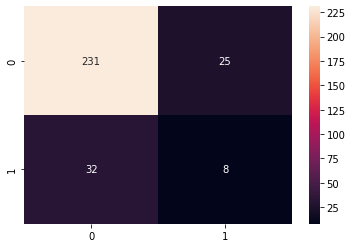

In [327]:
C = 33
kernel = "rbf"

model = SVC(C = C, kernel = kernel)
model.fit(x_train_smote, y_train_smote)

y_pred = model.predict(x_test)
print(f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")

In [328]:
model = SVC()
params = {"kernel" : ["linear", "poly", "rbf", "sigmoid"], 
          "C" : [0.0001, .00033, .001, .0033, .01, .033, .1, .33, 1, 3.3, 10, 33, 100]}


gridsearch = GridSearchCV(model, param_grid = params, cv = 5, scoring = "f1", return_train_score = True)
gridsearch.fit(x_train_rus, y_train_rus)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.00033, 0.001, 0.0033, 0.01, 0.033, 0.1,
                               0.33, 1, 3.3, 10, 33, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

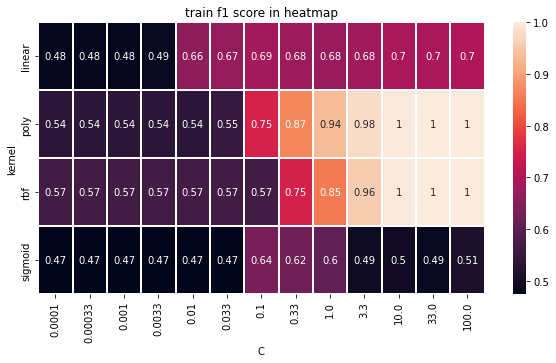

In [329]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)

plt.figure(figsize = (10, 5))
hmap = results.pivot("param_kernel", "param_C", "mean_train_score")
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.ylabel("kernel")
plt.xlabel("C")
plt.title("train f1 score in heatmap")
plt.show()

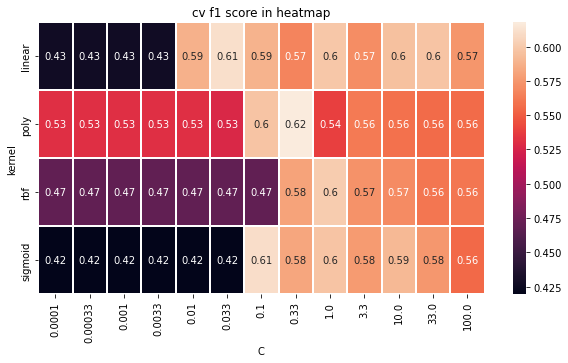

In [331]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)

plt.figure(figsize = (10, 5))
hmap = results.pivot("param_kernel", "param_C", "mean_test_score")
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.ylabel("kernel")
plt.xlabel("C")
plt.title("cv f1 score in heatmap")
plt.show()

0.2755102040816326


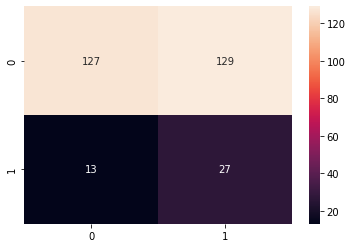

In [339]:
C = .33
kernel = "poly"

model = SVC(C = C, kernel = kernel)
model.fit(x_train_rus, y_train_rus)

y_pred = model.predict(x_test)
print(f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")

In [369]:
df.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1.0,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0.0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0.0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0.0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1.0,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [370]:
data = df.drop(columns = ["ID", "Stress busters", "What you miss the most"])
data.head()

,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?"
0,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1.0,4,Increased,NO,YES,YES
1,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0.0,3,Decreased,NO,YES,NO
2,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0.0,3,Remain Constant,NO,NO,YES
3,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0.0,3,Decreased,NO,NO,NO
4,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1.0,4,Remain Constant,NO,NO,NO


In [371]:
data["Health issue during lockdown"] = data["Health issue during lockdown"].replace("YES", 1)
data["Health issue during lockdown"] = data["Health issue during lockdown"].replace("NO", 0)

data["Health issue during lockdown"] = data["Health issue during lockdown"].astype("float")
data["Region of residence"] = data["Region of residence"].astype('category').cat.codes
data["Rating of Online Class experience"] = data["Rating of Online Class experience"].astype('category').cat.codes
data["Medium for online class"] = data["Medium for online class"].astype('category').cat.codes
data["Prefered social media platform"] = data["Prefered social media platform"].astype('category').cat.codes
data["Change in your weight"] = data["Change in your weight"].astype('category').cat.codes
data["Time utilized"] = data["Time utilized"].astype('category').cat.codes
data["Do you find yourself more connected with your family, close friends , relatives  ?"] = data["Do you find yourself more connected with your family, close friends , relatives  ?"].astype('category').cat.codes

data.head()

,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?"
0,0,21,2.0,2,1,4.0,0.0,7.0,3.0,2,1.0,4,1,0.0,1,1
1,0,21,0.0,1,2,0.0,2.0,10.0,3.0,6,0.0,3,0,0.0,1,0
2,0,20,7.0,5,1,3.0,0.0,6.0,2.0,2,0.0,3,2,0.0,0,1
3,0,20,3.0,5,2,2.0,1.0,6.0,5.0,1,0.0,3,0,0.0,0,0
4,0,21,3.0,2,1,3.0,1.0,8.0,3.0,1,1.0,4,2,0.0,0,0


In [372]:
train, test = train_test_split(data, random_state = 42, test_size = .25, stratify = data["Health issue during lockdown"])

train.shape, test.shape

((886, 16), (296, 16))

In [382]:
x_train = train.drop(columns = ["Health issue during lockdown"])
y_train = train["Health issue during lockdown"]

x_test = test.drop(columns = ["Health issue during lockdown"])
y_test = test["Health issue during lockdown"]
#x_train = np.array(x_train).as_matrix()
#x_test = np.array(x_test).as_matrix()

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((886, 15), (296, 15), (886,), (296,))

In [374]:
sm = SMOTE(random_state = 10)

x_train_smote, y_train_smote = sm.fit_sample(x_train, y_train)
x_train_smote.shape, y_train_smote.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((1530, 15), (1530,))

In [375]:
rus = RandomUnderSampler(random_state = 42)

x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)
x_train_rus.shape, y_train_rus.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((242, 15), (242,))

# Random Forest

In [217]:
model = RandomForestClassifier(max_depth = None)
params = {"n_estimators" : [10, 50, 100, 250, 500]}


gridsearch = GridSearchCV(model, param_grid = params, cv = 5, scoring = "f1", return_train_score = True)
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

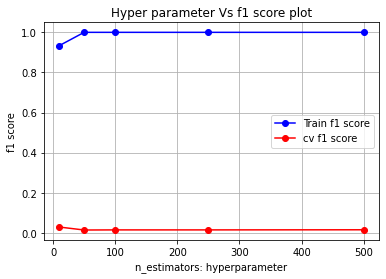

In [218]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)
results = results.sort_values(['param_n_estimators'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score']
K = results['param_n_estimators']

plt.figure()
plt.plot(K, train_score, "bo-", label = "Train f1 score")
plt.plot(K, cv_score, "ro-", label = "cv f1 score")
plt.legend()
plt.xlabel("n_estimators: hyperparameter")
plt.ylabel("f1 score")
plt.title("Hyper parameter Vs f1 score plot")
plt.grid()
plt.show()

0.13333333333333333


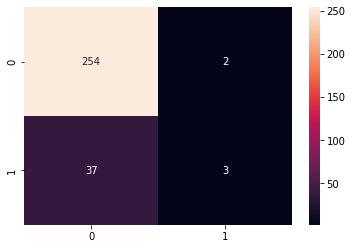

In [221]:
n_estimators = 10

model = RandomForestClassifier(max_depth = None, n_estimators = n_estimators)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")

In [223]:
model = RandomForestClassifier(max_depth = None)
params = {"n_estimators" : [10, 50, 100, 250, 500]}


gridsearch = GridSearchCV(model, param_grid = params, cv = 5, scoring = "f1", return_train_score = True)
gridsearch.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

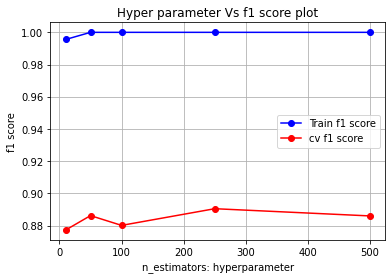

In [224]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)
results = results.sort_values(['param_n_estimators'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score']
K = results['param_n_estimators']

plt.figure()
plt.plot(K, train_score, "bo-", label = "Train f1 score")
plt.plot(K, cv_score, "ro-", label = "cv f1 score")
plt.legend()
plt.xlabel("n_estimators: hyperparameter")
plt.ylabel("f1 score")
plt.title("Hyper parameter Vs f1 score plot")
plt.grid()
plt.show()

0.24999999999999997


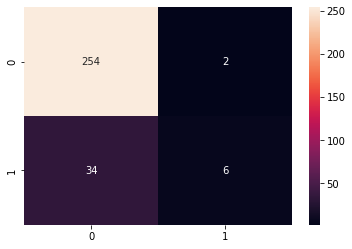

In [356]:
n_estimators = 250

model = RandomForestClassifier(max_depth = None, n_estimators = n_estimators)
model.fit(x_train_smote, y_train_smote)

y_pred = model.predict(x_test)
print(f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")

In [357]:
model = RandomForestClassifier(max_depth = None)
params = {"n_estimators" : [10, 50, 100, 250, 500]}

gridsearch = GridSearchCV(model, param_grid = params, cv = 5, scoring = "f1", return_train_score = True)
gridsearch.fit(x_train_rus, y_train_rus)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

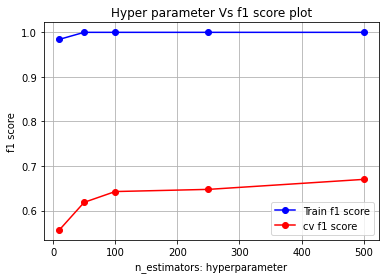

In [358]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)
results = results.sort_values(['param_n_estimators'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score']
K = results['param_n_estimators']

plt.figure()
plt.plot(K, train_score, "bo-", label = "Train f1 score")
plt.plot(K, cv_score, "ro-", label = "cv f1 score")
plt.legend()
plt.xlabel("n_estimators: hyperparameter")
plt.ylabel("f1 score")
plt.title("Hyper parameter Vs f1 score plot")
plt.grid()
plt.show()

0.24539877300613497


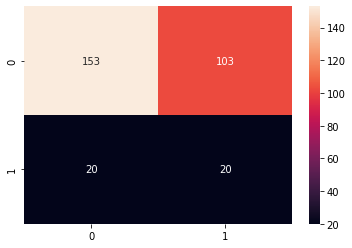

In [361]:
n_estimators = 250

model = RandomForestClassifier(max_depth = None, n_estimators = n_estimators)
model.fit(x_train_rus, y_train_rus)

y_pred = model.predict(x_test)
print(f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")

# GBDT

In [227]:
params = {"n_estimators": [10, 50, 100, 150], 
          "max_depth": [4, 8, 16, 32]}

model = xgb.XGBClassifier(n_jobs = -1)
gridsearch = GridSearchCV(model, param_grid = params, cv = 5, scoring = "f1", return_train_score = True)
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 8, 16, 32],
                         'n_estimators': [10, 50, 100, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_tra

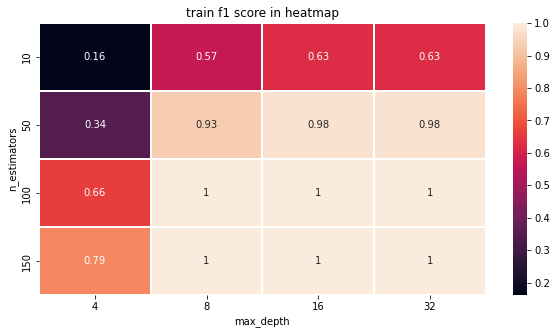

In [229]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)

plt.figure(figsize = (10, 5))
hmap = results.pivot("param_n_estimators", "param_max_depth", "mean_train_score")
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.ylabel("n_estimators")
plt.xlabel("max_depth")
plt.title("train f1 score in heatmap")
plt.show()

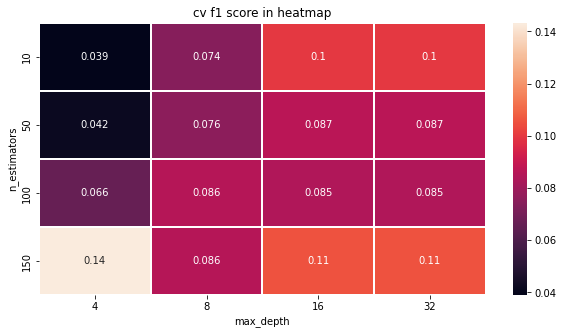

In [231]:
plt.figure(figsize = (10, 5))
hmap = results.pivot("param_n_estimators", "param_max_depth", "mean_test_score")
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.ylabel("n_estimators")
plt.xlabel("max_depth")
plt.title("cv f1 score in heatmap")
plt.show()

0.2352941176470588


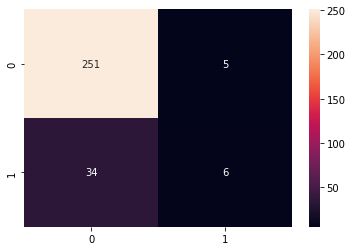

In [236]:
n_estimators = 10
max_depth = 32

model = xgb.XGBClassifier(n_jobs = -1, max_depth = max_depth, n_estimators = n_estimators)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")

In [376]:
params = {"n_estimators": [10, 50, 100, 150], 
          "max_depth": [4, 8, 16, 32]}

model = xgb.XGBClassifier(n_jobs = -1)
gridsearch = GridSearchCV(model, param_grid = params, cv = 5, scoring = "f1", return_train_score = True)
gridsearch.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 8, 16, 32],
                         'n_estimators': [10, 50, 100, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_tra

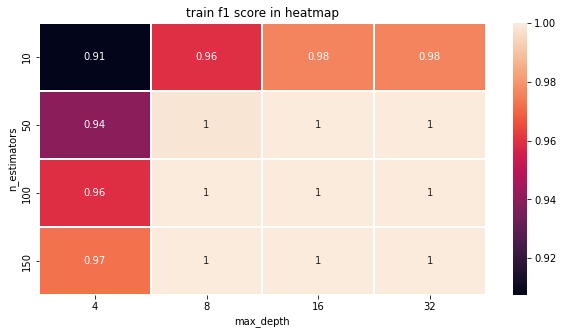

In [377]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)

plt.figure(figsize = (10, 5))
hmap = results.pivot("param_n_estimators", "param_max_depth", "mean_train_score")
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.ylabel("n_estimators")
plt.xlabel("max_depth")
plt.title("train f1 score in heatmap")
plt.show()

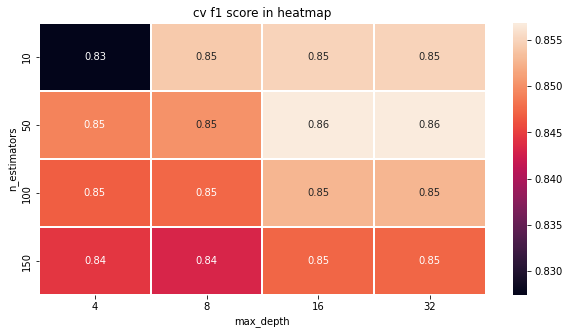

In [378]:
plt.figure(figsize = (10, 5))
hmap = results.pivot("param_n_estimators", "param_max_depth", "mean_test_score")
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.ylabel("n_estimators")
plt.xlabel("max_depth")
plt.title("cv f1 score in heatmap")
plt.show()

0.18181818181818182


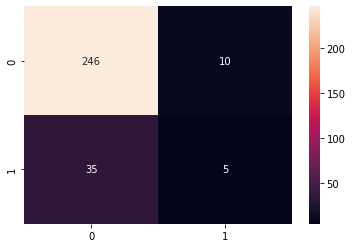

In [383]:
n_estimators = 10
max_depth = 8

model = xgb.XGBClassifier(n_jobs = -1, max_depth = max_depth, n_estimators = n_estimators)
model.fit(x_train_smote, y_train_smote)

y_pred = model.predict(x_test.values)
print(f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")

In [384]:
params = {"n_estimators": [10, 50, 100, 150], 
          "max_depth": [4, 8, 16, 32]}

model = xgb.XGBClassifier(n_jobs = -1)
gridsearch = GridSearchCV(model, param_grid = params, cv = 5, scoring = "f1", return_train_score = True)
gridsearch.fit(x_train_rus, y_train_rus)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 8, 16, 32],
                         'n_estimators': [10, 50, 100, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_tra

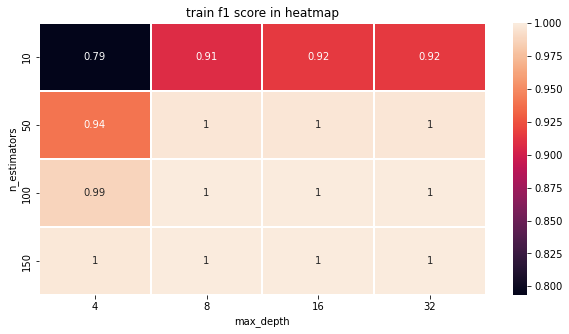

In [385]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)

plt.figure(figsize = (10, 5))
hmap = results.pivot("param_n_estimators", "param_max_depth", "mean_train_score")
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.ylabel("n_estimators")
plt.xlabel("max_depth")
plt.title("train f1 score in heatmap")
plt.show()

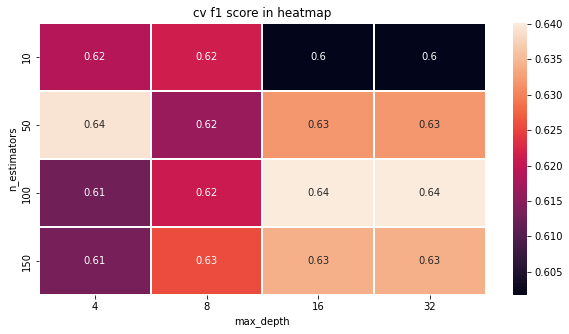

In [386]:
plt.figure(figsize = (10, 5))
hmap = results.pivot("param_n_estimators", "param_max_depth", "mean_test_score")
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.ylabel("n_estimators")
plt.xlabel("max_depth")
plt.title("cv f1 score in heatmap")
plt.show()

0.23529411764705882


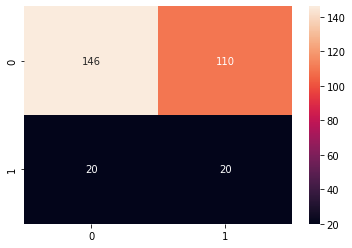

In [390]:
n_estimators = 100
max_depth = 16

model = xgb.XGBClassifier(n_jobs = -1, max_depth = max_depth, n_estimators = n_estimators)
model.fit(x_train_rus, y_train_rus)

y_pred = model.predict(x_test.values)
print(f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")